# Avacado Project
> #### Problem Statement:
> #### Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

_The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados._

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#### Some relevant columns in the dataset:

>* Date - The date of the observation<br>
>* AveragePrice - the average price of a single avocado<br>
>* type - conventional or organic<br>
>* year - the year<br>
>* Region - the city or region of the observation<br>
>* Total Volume - Total number of avocados sold<br>
>* 4046 - Total number of avocados with PLU 4046 sold<br>
>* 4225 - Total number of avocados with PLU 4225 sold<br>
>* 4770 - Total number of avocados with PLU 4770 sold<br>

#### Inspiration /Label

__The dataset can be seen in two angles to find the region and find the average price.__<br>
<p style="color:Red;">Task: One of Classification and other of Regression</p><br>
Do both tasks in the same .ipynb file and submit at single file.<br>

###  Importing Required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import zscore

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score,mean_tweedie_deviance
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

#### Importing Data set

In [2]:
avacado_df=pd.read_csv('https://raw.githubusercontent.com/rajsharma-bot/CSV-Data-file/main/avocado.csv',index_col=0)
avacado_df
#Using Index_col we are removing unwanted column i,e Unnamed:

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Exploratory Data Analysis

In [3]:
#getting data of top 5 column
avacado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#getting data of buttom 5 column
avacado_df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
#getting random sample data
avacado_df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14,2016-09-18,1.31,2194.01,5.22,1254.23,0.0,934.56,80.0,854.56,0.0,organic,2016,Louisville


In [6]:
##checking Data types of data sets
avacado_df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

From above code output we can see that column AveragePrice,Total Volume,4046,4225,4225,Total Bags,Small Bags,Large Bags,    XLarge Bags having float64 data type <br>
and Date,type,region column having Object data type <br>
and column region is having int64 data type


In [7]:
#Information about the data columns
avacado_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [9]:
## no. of rows and coloumns
avacado_df.shape

(18249, 13)

In [8]:
# check the stats
avacado_df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [10]:
avacado_df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
22,2017-07-30,1.72,470813.03,115910.95,169760.67,2027.83,183113.58,112306.79,69630.16,1176.63,conventional,2017,Seattle


In [11]:
#Splitting the Date to Year, Month and Day
avacado_df['Year'],avacado_df['Month'],avacado_df['Day']= avacado_df['Date'].str.split('-').str
avacado_df.drop(columns=['Date','year'],inplace=True)
avacado_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [12]:
#Converting Object datatype for column Yesr to integer type after splitting.
avacado_df['Year']=avacado_df['Year'].astype(int)
avacado_df['Month']=avacado_df['Month'].astype(int)
avacado_df['Date']=avacado_df['Day'].astype(int)
avacado_df.drop(columns=['Day'], inplace=True)

In [13]:
avacado_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  region        18249 non-null  object 
 11  Year          18249 non-null  int32  
 12  Month         18249 non-null  int32  
 13  Date          18249 non-null  int32  
dtypes: float64(9), int32(3), object(2)
memory usage: 1.9+ MB


In [14]:
# check for null values
avacado_df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
Year            0
Month           0
Date            0
dtype: int64

_There are no NULL or missing values in data set_

#### visualizing the null values clearly through Heatmap

<AxesSubplot:>

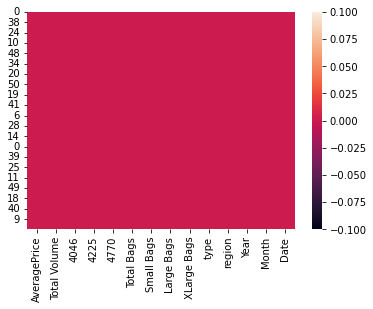

In [14]:
sns.heatmap(avacado_df.isnull())

In [17]:
# checking the stats again
avacado_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
Year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


As per the above statistics, 
a few columns have huge numbers and it is difficult to assume anything by just looking at the table. Few features indicate that the value is greater than the median, indicating that the data is skewed to the right.

#### separating the numerical and catagorical columns

In [18]:
category_data=[]
for i in avacado_df.dtypes.index:
    if avacado_df.dtypes[i]=='object':
        category_data.append(i)
category_data

['type', 'region']

In [19]:
numerical_data=[]
for j in avacado_df.dtypes.index:
    if avacado_df.dtypes[j]!='object':
        numerical_data.append(j)
print(len(numerical_data))
numerical_data

12


['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'Year',
 'Month',
 'Date']

from above code for category_data and numerical_data data, we can see that there is two object columns and 12 numeric columns

# Data Visualisation

### univariate Analysis

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


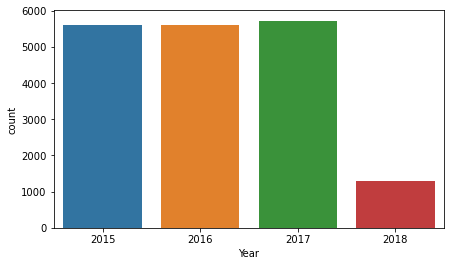

In [20]:
#Checking the count plot of Year
print(avacado_df["Year"].value_counts())
plt.figure(figsize=(7,4))
sns.countplot(avacado_df["Year"])
plt.show()

above code we can see count of record for years mention in data set

conventional    9126
organic         9123
Name: type, dtype: int64


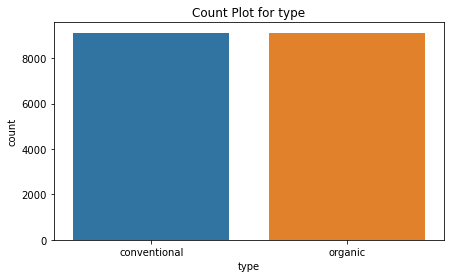

In [21]:
#Checking the count plot of Type
print(avacado_df["type"].value_counts())
plt.figure(figsize=(7,4))
sns.countplot(avacado_df["type"])
plt.title("Count Plot for type")
plt.show()

As per above plotting we can see Conventional and Organic Avacado column has almost equal count.

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


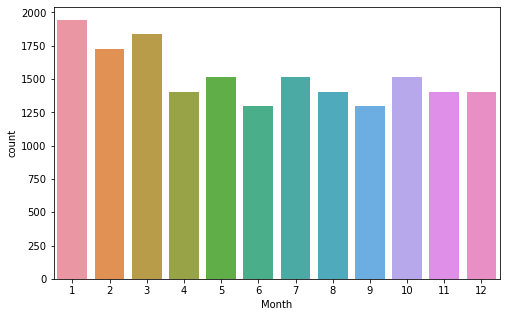

In [22]:
#Checking the count plot of Month
plt.figure(figsize=(8,5))
sns.countplot(avacado_df["Month"])
print(avacado_df["Month"].value_counts())
plt.show()

As per above plotting we can see that june have lowest record and january have highest record

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

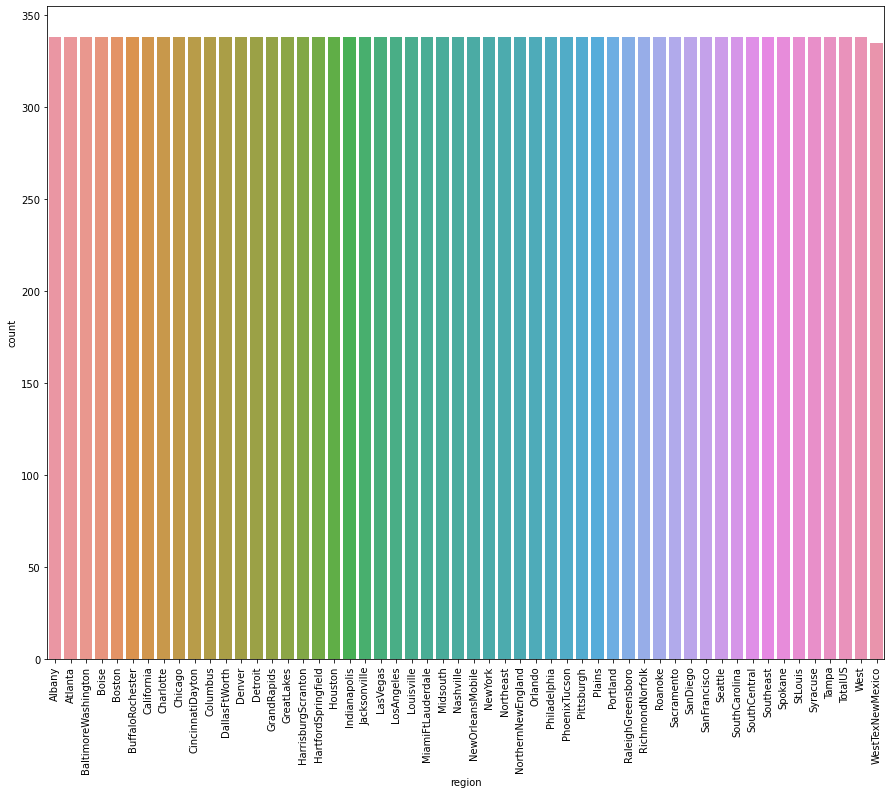

In [23]:
#Checking the count plot of region

plt.figure(figsize=(15,12))
sns.countplot(avacado_df["region"])
plt.xticks(rotation=90)
print(avacado_df["region"].value_counts())
plt.show()

_As per above plotting we can see that all region have same count except WestTexNewMexico_

### Bivariate Analysis

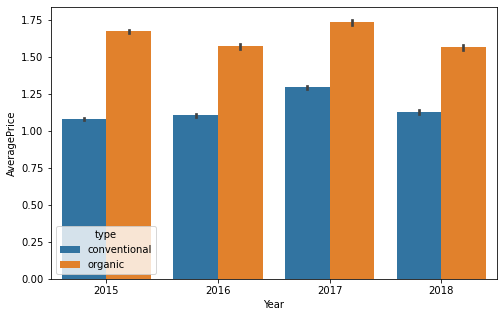

In [24]:
#Comparing average prices in different years

plt.figure(figsize=(8,5))
sns.barplot(x="Year", y="AveragePrice", hue="type", data=avacado_df)
plt.show()

we can see that Price was significantly higher in year 2017.<br>
As usual, Organic product has higher price than conventional product in All year

<Figure size 576x360 with 0 Axes>

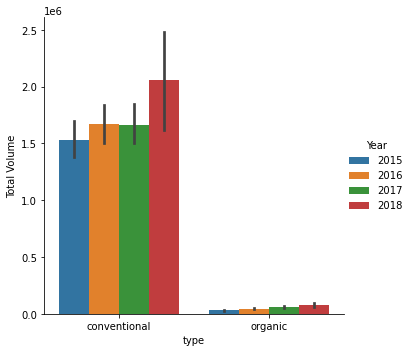

In [25]:
plt.figure(figsize=(8,5))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=avacado_df)
plt.show()

<Figure size 576x360 with 0 Axes>

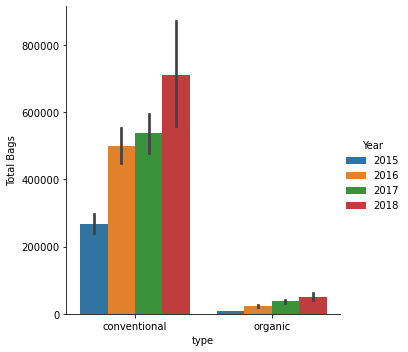

In [26]:
plt.figure(figsize=(8,5))
sns.catplot(x="type", y="Total Bags", hue="Year", data=avacado_df, kind="bar")
plt.show()

In [36]:
avacado_df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'Date'],
      dtype='object')

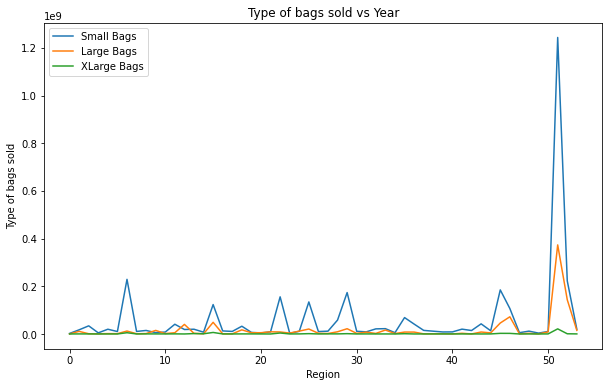

In [37]:
feature = avacado_df[["Small Bags","Large Bags","XLarge Bags"]].groupby(avacado_df.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Type of bags sold vs Year")
plt.xlabel("Region")
plt.ylabel("Type of bags sold")
plt.show()

In the Tampa area, small bag sizes are in high demand.<br>
followed by large bag sizes, and Xlarge bag sizes are the least popular.

#### Encoding catagorical data

In [38]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

avacado_df['type'] = le.fit_transform(avacado_df['type'])
avacado_df['region'] = le.fit_transform(avacado_df['region'])

avacado_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11,29


Now all object type data is converted to numerical format.

## Correlation

In [39]:
corr=avacado_df.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281,0.081033,-0.012969,0.000319
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000280,-0.000032,-0.000085,-0.000013


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

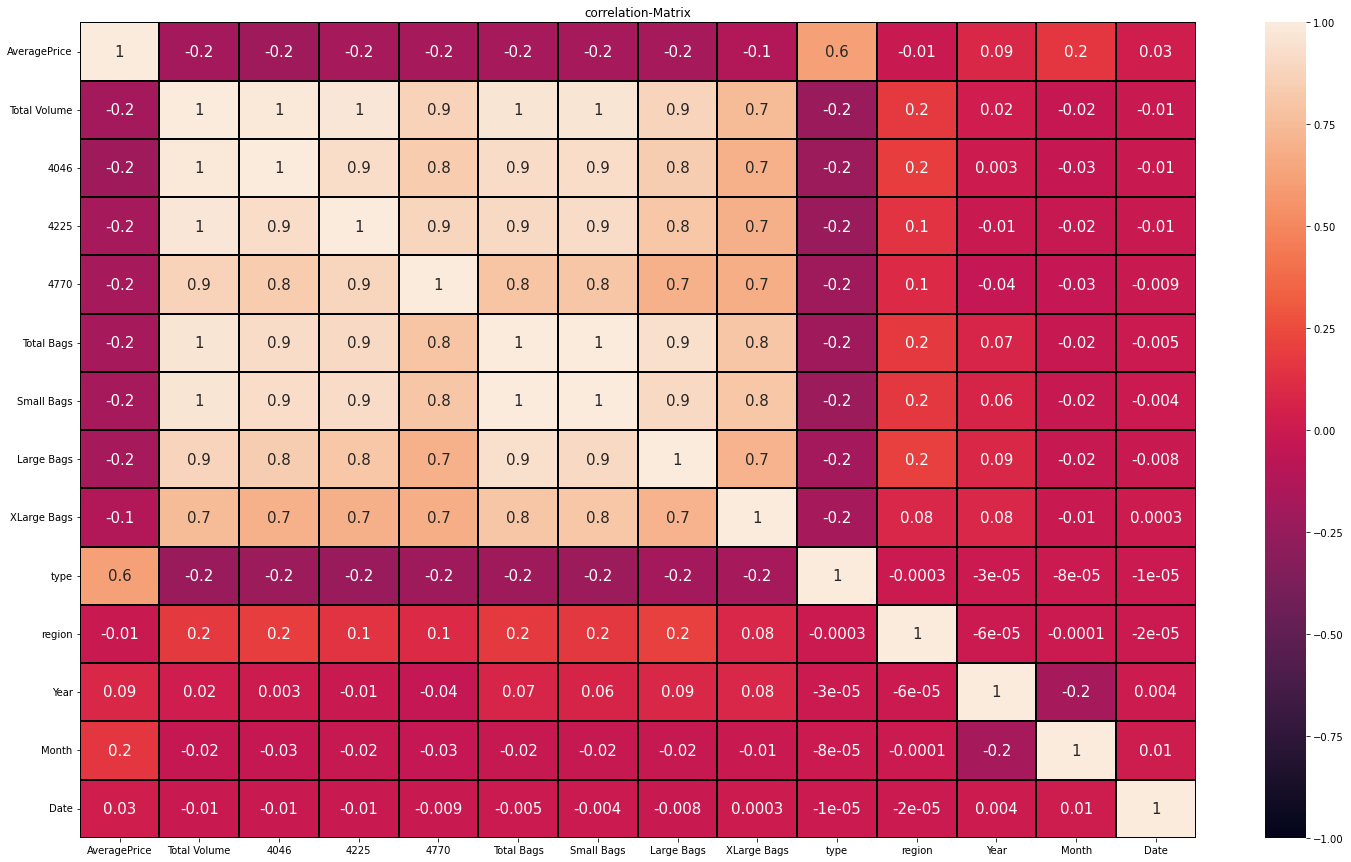

In [40]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,15))
sns.heatmap(corr,linewidths=.1,vmin=-1, vmax=1, fmt='.1g', linecolor='black', annot = True, annot_kws={'size':15})
plt.title('correlation-Matrix')
plt.yticks(rotation=0);

From above heat map we can see multicollinearity issue between features "4046", "4225", "4770", "Small Bags", "Large Bags" and "XLarge Bags". We will drop these columns after cross checking coorrelation using VIF.

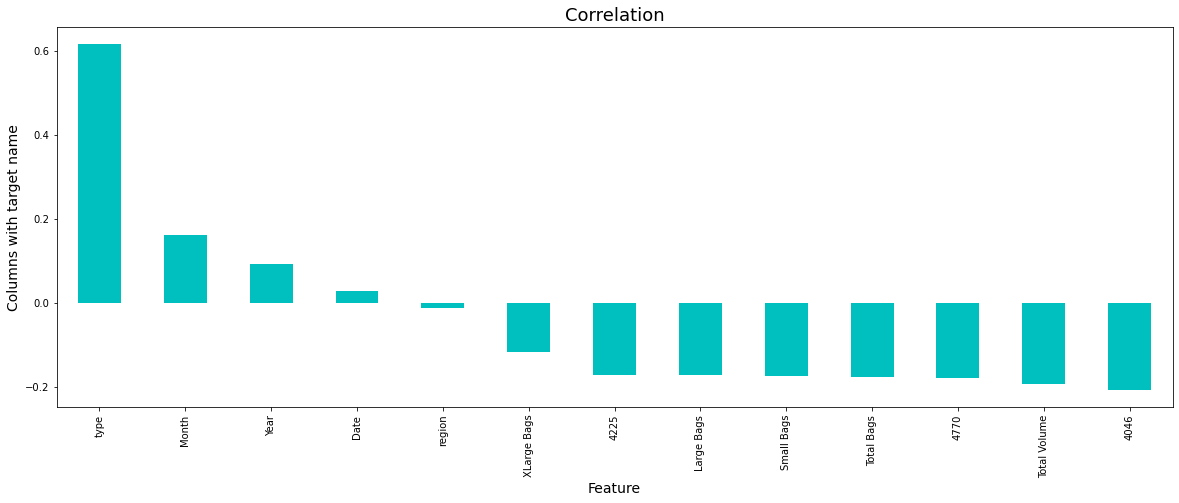

In [41]:
plt.figure(figsize=(20,7))
corr['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From above Plotting we can see features like XLargebags, 4225, Large bags, Small bags,Total Bags, 4770, Total Volumes, and 4046 are negatively correlated.Region has almost no relation.

# Checking outliers

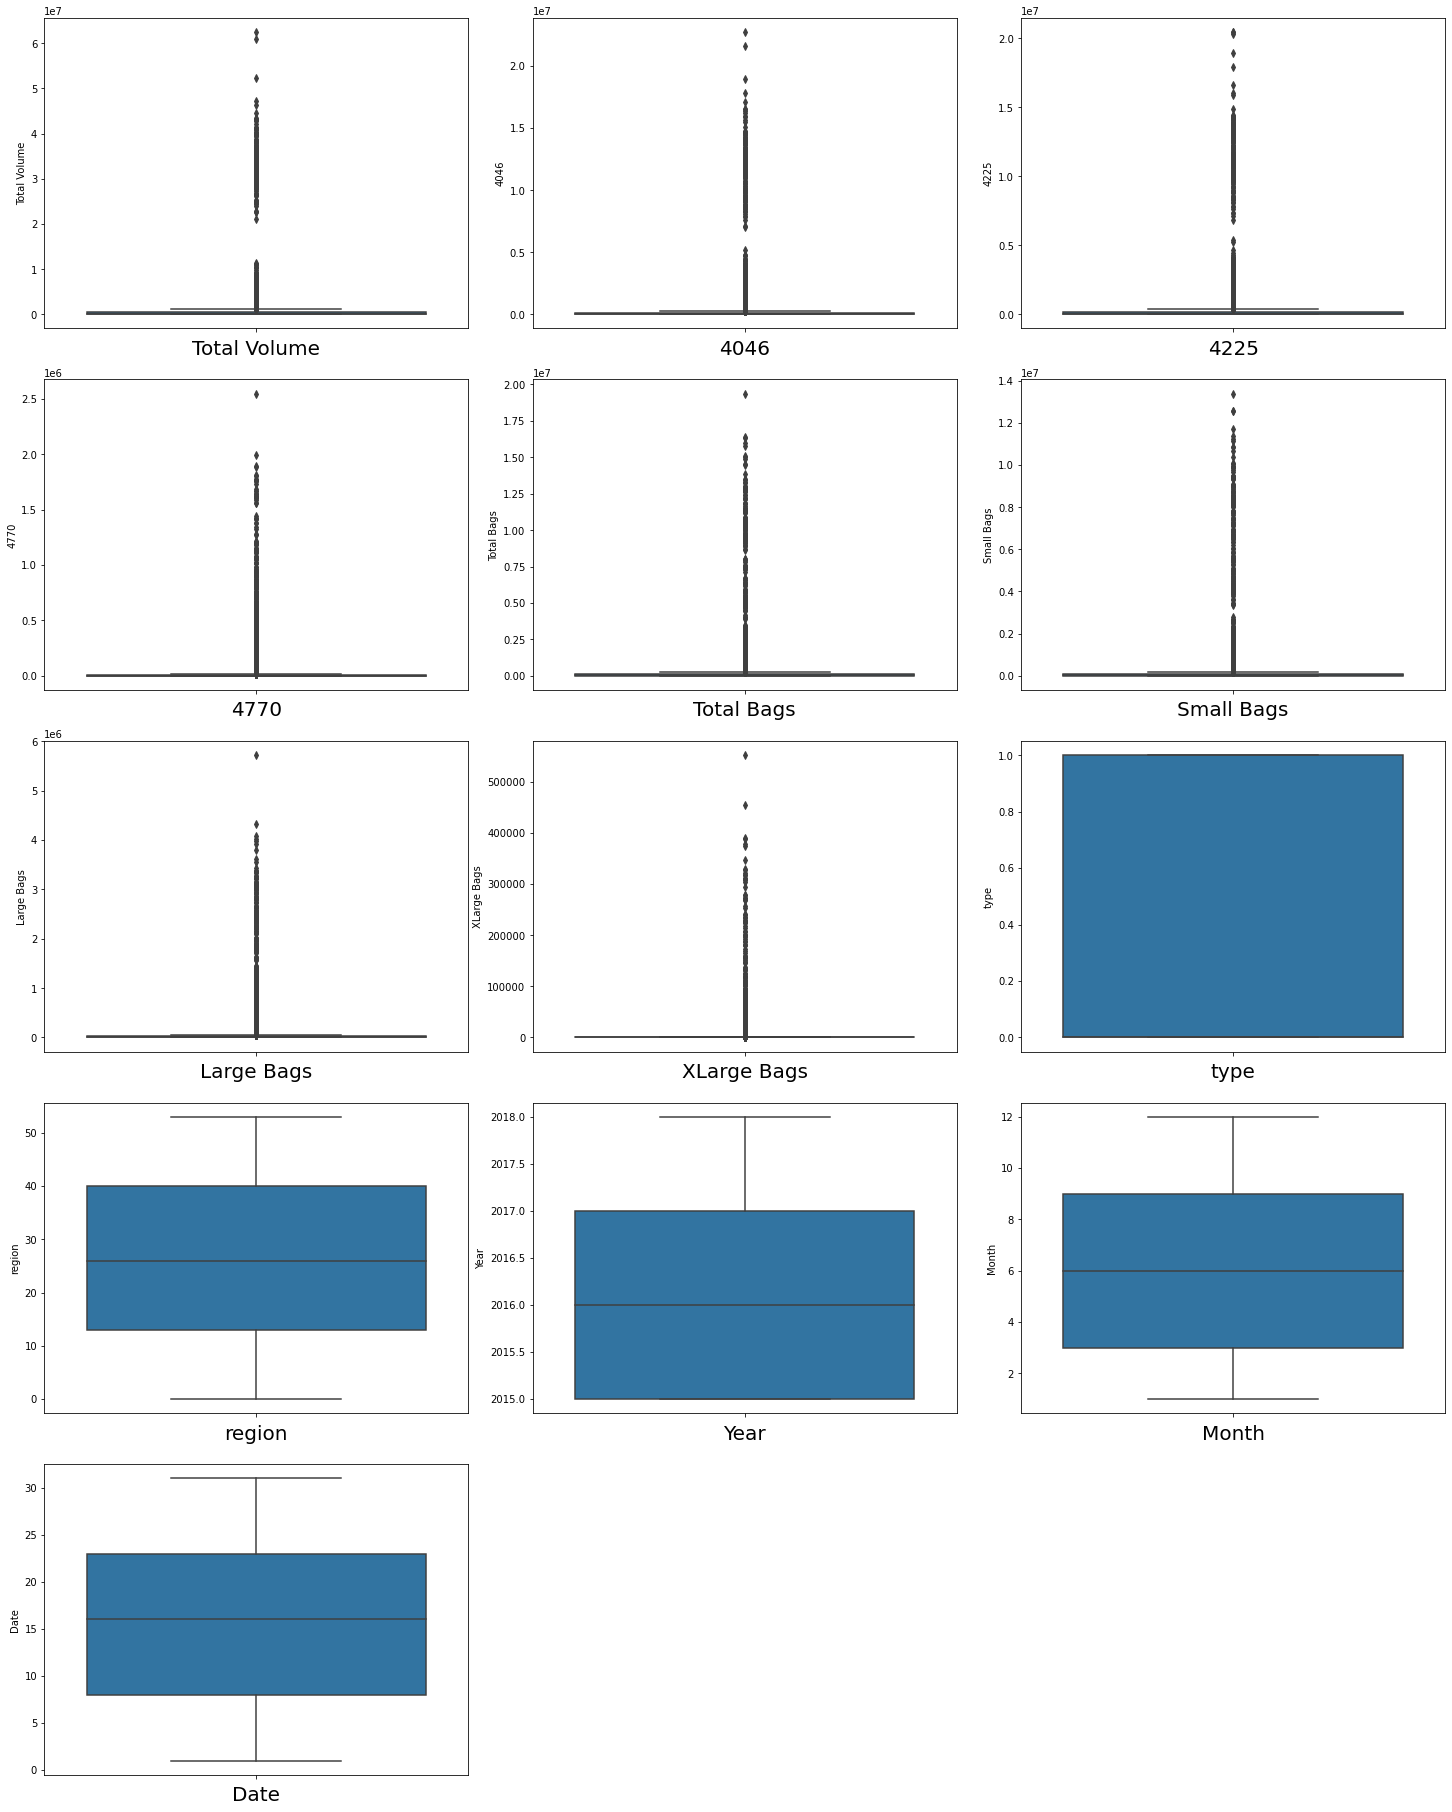

In [42]:
#boxPlot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
features = avacado_df.drop("AveragePrice", axis=1)
for column in features:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(y=column, data=avacado_df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From above ploting we can see Outliers present in column 'Total Volume' and 'Total Bags'.<br>
We will now remove the Outliers through ZScore method.

In [43]:
avacado_df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'Date'],
      dtype='object')

In [44]:
#Features having Outliers
avac_df = avacado_df[['Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [45]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(avac_df))

# Creating new dataframe
new_df=avacado_df[(z<3).all(axis=1)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,2018,2,4
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,2018,1,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,2018,1,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,2018,1,14


In [47]:
avacado_df.shape

(18249, 14)

In [48]:
new_df.shape

(17782, 14)

In [49]:
# Checking the the data loss
data_loss = (18249-17782)/18249*100
data_loss

2.55904433119623

In [50]:
avacado_df=new_df.copy()

### Skewness

In [51]:
#checking skewness

avacado_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
region          0.005773
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

We can see skewness on most of the features except few like Year, Month, Day.<br>AveragePrice is our target vaiable, so we will ignore the skewness.


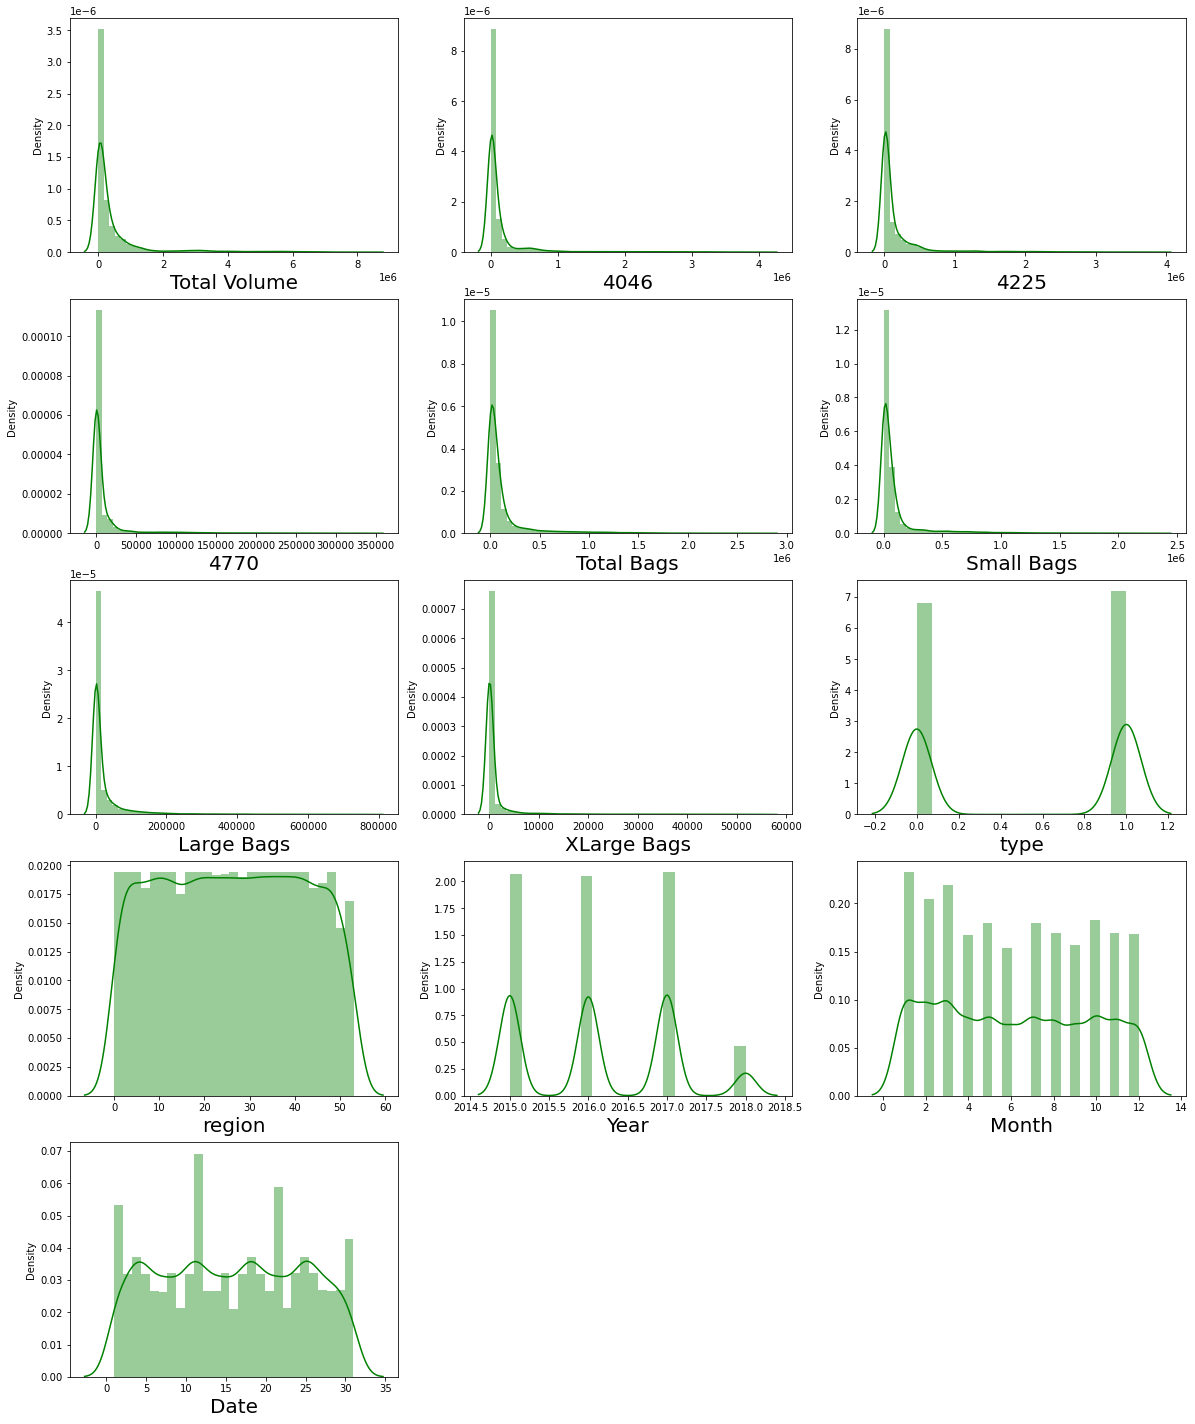

In [52]:
#Checking the skewness through Dist plot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
features = avacado_df.drop("AveragePrice", axis=1)
for column in features:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(avacado_df[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

From above ploting we can see skewness towards right on many features

### Removing Skewness
> ###### Using Power Transform

In [53]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [54]:
avacado_df[features] = scaler.fit_transform(avacado_df[features].values)
avacado_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [55]:
#checking the skewness after using yeo=johnson ethod
avacado_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
region          0.005773
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

Still we can see skewness on column XLarge Bags. Let's remove this through Log transform

In [56]:
# Removing skewness using log transformation
avacado_df["XLarge Bags"] = np.log1p(avacado_df["XLarge Bags"])

In [57]:
#checking the skewness after using log transformation
avacado_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
type           -0.052210
region          0.005773
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

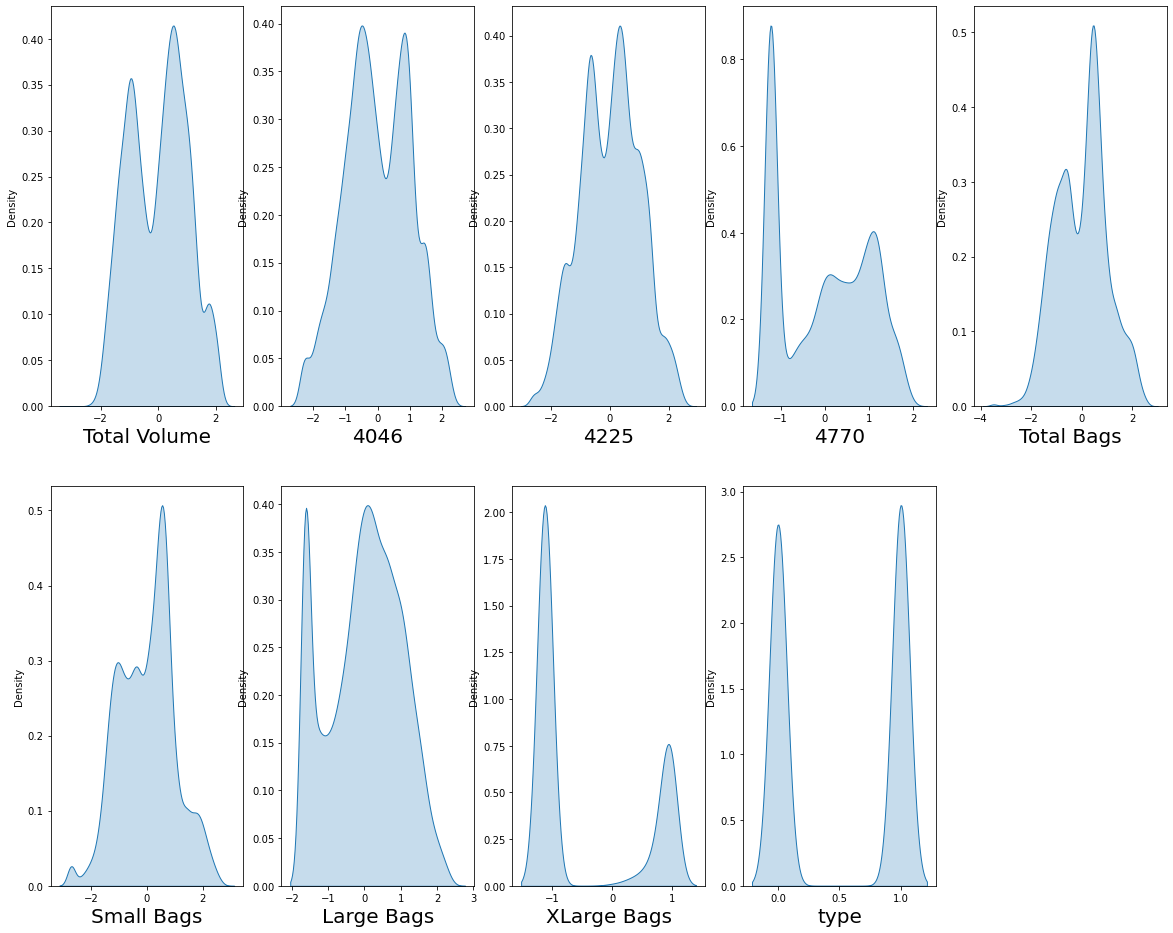

In [58]:
#checking the skewness again through Dist plot.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
features = avacado_df.drop("AveragePrice", axis=1)
for column in features:
    if plotnumber<=9:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(avacado_df[column], hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [59]:
# Dropping irrelevant columns
avacado_df.drop("region",axis=1, inplace=True)
avacado_df.drop("XLarge Bags",axis=1, inplace=True)

In [60]:
avacado_df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,Year,Month,Date
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,0,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,0,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,0,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,0,2015,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,0,2015,11,29
5,1.26,-0.128156,-0.612183,0.306698,-0.237101,-0.642217,-0.444581,-0.704207,0,2015,11,22
6,0.99,0.055098,-0.570776,0.485540,-0.048891,-0.546966,-0.356450,-0.714159,0,2015,11,15
7,0.98,0.179862,-0.758246,0.625428,-0.086867,-0.632919,-0.462169,-0.336840,0,2015,11,8
8,1.02,0.137472,-0.653921,0.558520,-0.070864,-0.407700,-0.233340,-0.512295,0,2015,11,1
9,1.07,0.001945,-0.708247,0.430833,-0.001381,-0.531048,-0.363091,-0.335863,0,2015,10,25


# Data preprocessing

In [61]:
avacado_df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'type', 'Year', 'Month', 'Date'],
      dtype='object')

#### Splitting data in X&Y

In [62]:
x = avacado_df.drop('AveragePrice', axis=1)
y = avacado_df['AveragePrice']

Scaling data with Standard scalar

In [63]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,Year,Month,Date
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.026443,-1.214908,1.641434,1.289235
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.026443,-1.214908,1.641434,0.491750
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.026443,-1.214908,1.641434,-0.305734
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.026443,-1.214908,1.641434,-1.103219
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.026443,-1.214908,1.358706,1.517088


scaled data using standard scaler.

__Variance Inflation Factor__

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Value
0,Total Volume,51.519431
1,4046,6.752126
2,4225,11.107325
3,4770,3.890095
4,Total Bags,34.408868
5,Small Bags,16.622534
6,Large Bags,3.460516
7,type,3.320393
8,Year,1.332874
9,Month,1.048738


VIF value more that 10 for Total Volume, 4046, 4225,Total Bags, Small Bags. These columns has multicollinearity issue. we have check one by one column having higher value first.

In [66]:
x.drop("Total Volume",axis=1,inplace=True)

In [67]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Checking the values
vif

,VIF values,Features
0,3.535569,4046
1,4.271655,4225
2,3.869884,4770
3,24.481419,Total Bags
4,16.622115,Small Bags
5,3.415743,Large Bags
6,3.130034,type
7,1.328284,Year
8,1.046023,Month
9,1.000535,Date


In [68]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [69]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# checking the values
vif

,VIF values,Features
0,3.516917,4046
1,4.127529,4225
2,3.869537,4770
3,4.094102,Small Bags
4,1.861818,Large Bags
5,3.127554,type
6,1.304576,Year
7,1.045423,Month
8,1.000355,Date


In [70]:
avacado_df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,Year,Month,Date
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,0,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,0,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,0,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,0,2015,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,0,2015,11,29
5,1.26,-0.128156,-0.612183,0.306698,-0.237101,-0.642217,-0.444581,-0.704207,0,2015,11,22
6,0.99,0.055098,-0.570776,0.485540,-0.048891,-0.546966,-0.356450,-0.714159,0,2015,11,15
7,0.98,0.179862,-0.758246,0.625428,-0.086867,-0.632919,-0.462169,-0.336840,0,2015,11,8
8,1.02,0.137472,-0.653921,0.558520,-0.070864,-0.407700,-0.233340,-0.512295,0,2015,11,1
9,1.07,0.001945,-0.708247,0.430833,-0.001381,-0.531048,-0.363091,-0.335863,0,2015,10,25


## Modeling

#### Finding best random state

In [71]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.5258004026800944 on Random_state  140


Maximum r2 score is 52.58% and random state is 140

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Applying Regression Algorithms

In [73]:
#Importing all the Regression Algorithms

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Linear Regression

In [74]:
# Checking R2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error(MAE):',mean_absolute_error(y_test, predLR))
print('Mean squared error(MSE):',mean_squared_error(y_test, predLR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5258004026800944
Mean abs error(MAE): 0.21640749309889779
Mean squared error(MSE): 0.07764341445389435
Root Mean squared error(RMSE): 0.27864567905118204
The CV score  for Linear_regression is : 0.09210284810290306


# Random Forest Regressor

In [75]:
# Checking R2score for Random Forest Regressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)


#Prediction
pred_random_forest=random_forest.predict(x_test)
print('R2_score:',r2_score(y_test,pred_random_forest))
print('Mean abs error:',mean_absolute_error(y_test, pred_random_forest))
print('Mean squared error:',mean_squared_error(y_test, pred_random_forest))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_random_forest)))

# Checking cv score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(random_forest,x,y,cv=5).mean())


R2_score: 0.8601652456530386
Mean abs error: 0.10434667291471414
Mean squared error: 0.022895944762886596
Root Mean squared error(RMSE): 0.15131406003041026
The CV  score for  the Random forest regressor is: 0.20175686222977185


# Decision Tree Regressor

In [76]:
# Checking R2 score for Decision Tree Regressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)

# prediction
pred_decision_tree=decision_tree.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_decision_tree))
print('Mean abs error:',mean_absolute_error(y_test, pred_decision_tree))
print('Mean squared error:',mean_squared_error(y_test, pred_decision_tree))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_decision_tree)))

# Checking cv score for Decision Tree Regression
print('The CV score  for  the Decision Tree Regression is :',cross_val_score(decision_tree,x,y,cv=5).mean())

R2_Score: 0.7220824980663766
Mean abs error: 0.13984817244611059
Mean squared error: 0.045505023430178065
Root Mean squared error(RMSE): 0.2133190648539836
The CV score  for  the Decision Tree Regression is : -0.3560682787087989


# KNN Regressor

In [77]:
# Checking R2 score for KNN Regressor
knn_reg=KNN()
knn_reg.fit(x_train,y_train)

#Prediction
pred_knn_reg=knn_reg.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_knn_reg))
print('Mean abs error:',mean_absolute_error(y_test, pred_knn_reg))
print('Mean squared error:',mean_squared_error(y_test, pred_knn_reg))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_knn_reg)))

# Checking cv score for Decision Tree Regression
print('The CV score  for  the Decision Tree Regression is :',cross_val_score(knn_reg,x,y,cv=5).mean())

R2_Score: 0.7773332886771042
Mean abs error: 0.13958013120899718
Mean squared error: 0.03645849522024368
Root Mean squared error(RMSE): 0.19094107787546313
The CV score  for  the Decision Tree Regression is : 0.1334207389761051


# Support Vector Regressor

In [78]:
# Checking R2 score for Support Vector regressor
svr=SVR()
svr.fit(x_train,y_train)
#prediction
pred_svr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_svr))
print('Mean abs error:',mean_absolute_error(y_test, pred_svr))
print('Mean squared error:',mean_squared_error(y_test, pred_svr))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_svr)))

# Checking cv score for SVR Regression
print('The CV score  for  the SVR regressor is :',cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.769734316716554
Mean abs error: 0.14205383029055454
Mean squared error: 0.037702718396921076
Root Mean squared error(RMSE): 0.19417187849150833
The CV score  for  the SVR regressor is : 0.18043208617358536


# Stochastic Gradient Descent Regressor

In [79]:
# Checking R2 score for SGD Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)


#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('Mean abs error:',mean_absolute_error(y_test, predSGD))
print('Mean squared error:',mean_squared_error(y_test, predSGD))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predSGD)))

# Checking cv score for SGD Regression
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5255976784191105
Mean abs error: 0.2166258895758712
Mean squared error: 0.07767660765756722
Root Mean squared error(RMSE): 0.278705234356241
The  CV score for the SGD  regressor is : 0.07982166698975934


# Gradient Boosting Regressor

In [80]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

#prediction
predGBR=GBR.predict(x_test)
print('R2_Score:',r2_score(y_test,predGBR))
print('Mean abs error:',mean_absolute_error(y_test, predGBR))
print('Mean squared error:',mean_squared_error(y_test, predGBR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predGBR)))

# Checking cv score for GBR Regression
print('The  CV score for the GradientBoosting  regressor is :',cross_val_score(GBR,x,y,cv=5).mean())

R2_Score: 0.7256372246458853
Mean abs error: 0.16118795091928673
Mean squared error: 0.044922987699563835
Root Mean squared error(RMSE): 0.211950436894015
The  CV score for the GradientBoosting  regressor is : 0.3546627873770425


In [81]:
print('R2_score for Linear Regression:',r2_score(y_test,predLR),'The CV score :',cross_val_score(LR,x,y,cv=5).mean())
print('R2_score for Random Forest Regressor:',r2_score(y_test,pred_random_forest),"The CV  score:",cross_val_score(random_forest,x,y,cv=5).mean())
print('R2_Score for Decision Tree Regressor:',r2_score(y_test,pred_decision_tree),'The CV score :',cross_val_score(decision_tree,x,y,cv=5).mean())
print('R2_Score for KNN Regressor:',r2_score(y_test,pred_knn_reg),'The CV score:',cross_val_score(knn_reg,x,y,cv=5).mean())
print('R2_Score for SVR:',r2_score(y_test,pred_svr),'The CV score  :',cross_val_score(svr,x,y,cv=5).mean())
print('R2_Score for SGDRegressor:',r2_score(y_test,predSGD),'The  CV score :',cross_val_score(SGD,x,y,cv=5).mean())
print('R2_Score for GradientBoostingRegressor:',r2_score(y_test,predGBR),'The  CV score :',cross_val_score(GBR,x,y,cv=5).mean())


R2_score for Linear Regression: 0.5258004026800944 The CV score : 0.09210284810290306
R2_score for Random Forest Regressor: 0.8601652456530386 The CV  score: 0.1946063898457815
R2_Score for Decision Tree Regressor: 0.7220824980663766 The CV score : -0.3537600496956093
R2_Score for KNN Regressor: 0.7773332886771042 The CV score: 0.1334207389761051
R2_Score for SVR: 0.769734316716554 The CV score  : 0.18043208617358536
R2_Score for SGDRegressor: 0.5255976784191105 The  CV score : 0.09227309468879534
R2_Score for GradientBoostingRegressor: 0.7256372246458853 The  CV score : 0.354655204348965


From the above observation, looking at the difference of R2 score and the cross validation score we conclude that Gradient Boosting is our best fitting model

# Hyperparameter tuning

In [83]:
#Linear Regression
parameters = {
        "n_estimators":[20,40,80,120,160,200],
        "max_depth":[1,3,5,7,9],
        "learning_rate":[0.01,0.1,1]
        }

In [84]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)

Using GridSearch CV for Hyperparameter tunning my best fit model

In [85]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [20, 40, 80, 120, 160, 200]})

In [86]:
GCV.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}

In [87]:
Avocado = GradientBoostingRegressor(learning_rate = 0.1, max_depth= 9, n_estimators= 200)
Avocado.fit(x_train, y_train)
pred_avocado = Avocado.predict(x_test)

print('R2_score:',r2_score(y_test,pred_avocado))
print('Mean abs error(MAE):',mean_absolute_error(y_test, pred_avocado))
print('Mean squared error(MSE):',mean_squared_error(y_test, pred_avocado))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_avocado)))

R2_score: 0.8768698114246383
Mean abs error(MAE): 0.09906046529567453
Mean squared error(MSE): 0.020160810589835692
Root Mean squared error(RMSE): 0.14198876923840031


Model r2 score has been increased to 87.65%

### Saving the model

In [88]:
# Saving the model using .pkl
import joblib
joblib.dump(Avocado,"Avocado_Price.pkl")

['Avocado_Price.pkl']

#### Predicting the saved model

In [89]:
# Loading the saved model
model=joblib.load("Avocado_Price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0.77673956, 0.87727139, 1.02286623, ..., 1.74374779, 1.10033742,
       2.2650339 ])

In [90]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
Predicted,0.77674,0.877271,1.022866,1.798119,1.345649,1.376647,0.798454,1.157872,1.521098,1.014459,...,0.85701,1.095768,1.594979,0.818311,2.046995,1.268762,1.223619,1.743748,1.100337,2.265034
Original,0.76000,0.980000,0.960000,1.850000,1.370000,1.350000,0.750000,1.170000,1.500000,1.020000,...,0.73000,1.070000,1.640000,0.790000,2.170000,1.170000,1.220000,1.680000,0.870000,2.330000


Original and Predicted values are very close.

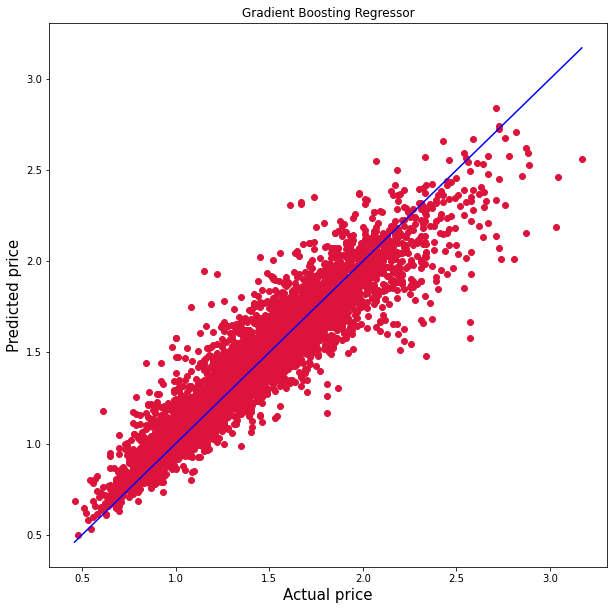

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("Gradient Boosting Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

# 2.Region using Classification

In [92]:
#Importing the Dataset
avacadoDf_cl=pd.read_csv('https://raw.githubusercontent.com/rajsharma-bot/CSV-Data-file/main/avocado.csv',index_col=0)
avacadoDf_cl.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [93]:
#Splitting the Date to Year, Month and Day

avacadoDf_cl['Year'], avacadoDf_cl['Month'], avacadoDf_cl['Day'] = avacadoDf_cl['Date'].str.split('-').str
avacadoDf_cl.drop(columns=['Date','year'], inplace=True)
avacadoDf_cl

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [94]:
#Converting Object datatype for column Yesr to integer type after splitting.

avacadoDf_cl['Year']=avacadoDf_cl['Year'].astype(int)
avacadoDf_cl['Month']=avacadoDf_cl['Month'].astype(int)
avacadoDf_cl['Date']=avacadoDf_cl['Day'].astype(int)
avacadoDf_cl.drop(columns=['Day'], inplace=True)

separating the Numerical and Catagorical columns

In [95]:
category_data=[]
for i in avacadoDf_cl.dtypes.index:
    if avacadoDf_cl.dtypes[i]=='object':
        category_data.append(i)
category_data

['type', 'region']

In [96]:
numerical_data=[]
for j in avacadoDf_cl.dtypes.index:
    if avacadoDf_cl.dtypes[j]!='object':
        numerical_data.append(j)
print(len(numerical_data))
numerical_data

12


['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'Year',
 'Month',
 'Date']

In [97]:
avacadoDf_cl['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [98]:
avacadoDf_cl['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

# Outliers

In first case we have Outliers present in the daraset. Let's remove them

In [99]:
# Features containing outliers
features = avacadoDf_cl[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [100]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
7,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
8,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
9,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
10,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [101]:
# Creating new dataframe
new_df1 = avacadoDf_cl[(z<3).all(axis=1)] 
new_df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [102]:
# Checking the skewness
new_df1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

In [103]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [104]:
new_df1[features] = scaler.fit_transform(new_df1[features].values)
new_df1[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [105]:
# Checking skewness after using yeo=johnson ethod
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

In [106]:
# Removing skewness using log transformation
new_df1["XLarge Bags"] = np.log1p(new_df1["XLarge Bags"])

In [107]:
# Let's check the skewness again
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

XLarge Bags still has skewness. Let's drop it.

In [108]:
new_df1.drop("XLarge Bags",axis=1, inplace=True)

In [109]:
new_df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,Year,Month,Date
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,conventional,Albany,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,conventional,Albany,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,conventional,Albany,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,conventional,Albany,2015,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,conventional,Albany,2015,11,29


#### Encoding Catagorical Data

In [110]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df1[categorical_col]= new_df1[categorical_col].apply(LE.fit_transform)
new_df1[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7,1,53
8,1,53
9,1,53
10,1,53


# Correlation

In [111]:
cor = new_df1.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,Year,Month,Date
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,0.608447,0.010428,0.099910,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,-0.800828,0.065709,0.076584,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,-0.725826,0.159390,-0.002396,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,-0.747722,0.032273,-0.004533,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,-0.780988,0.037805,-0.051657,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,-0.725686,0.065996,0.210924,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,-0.720466,0.051985,0.185955,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,-0.500026,0.086573,0.190295,-0.016942,-0.000876
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,1.000000,0.021970,0.007399,-0.005044,-0.002469
region,0.010428,0.065709,0.159390,0.032273,0.037805,0.065996,0.051985,0.086573,0.021970,1.000000,-0.003610,0.002175,0.000751


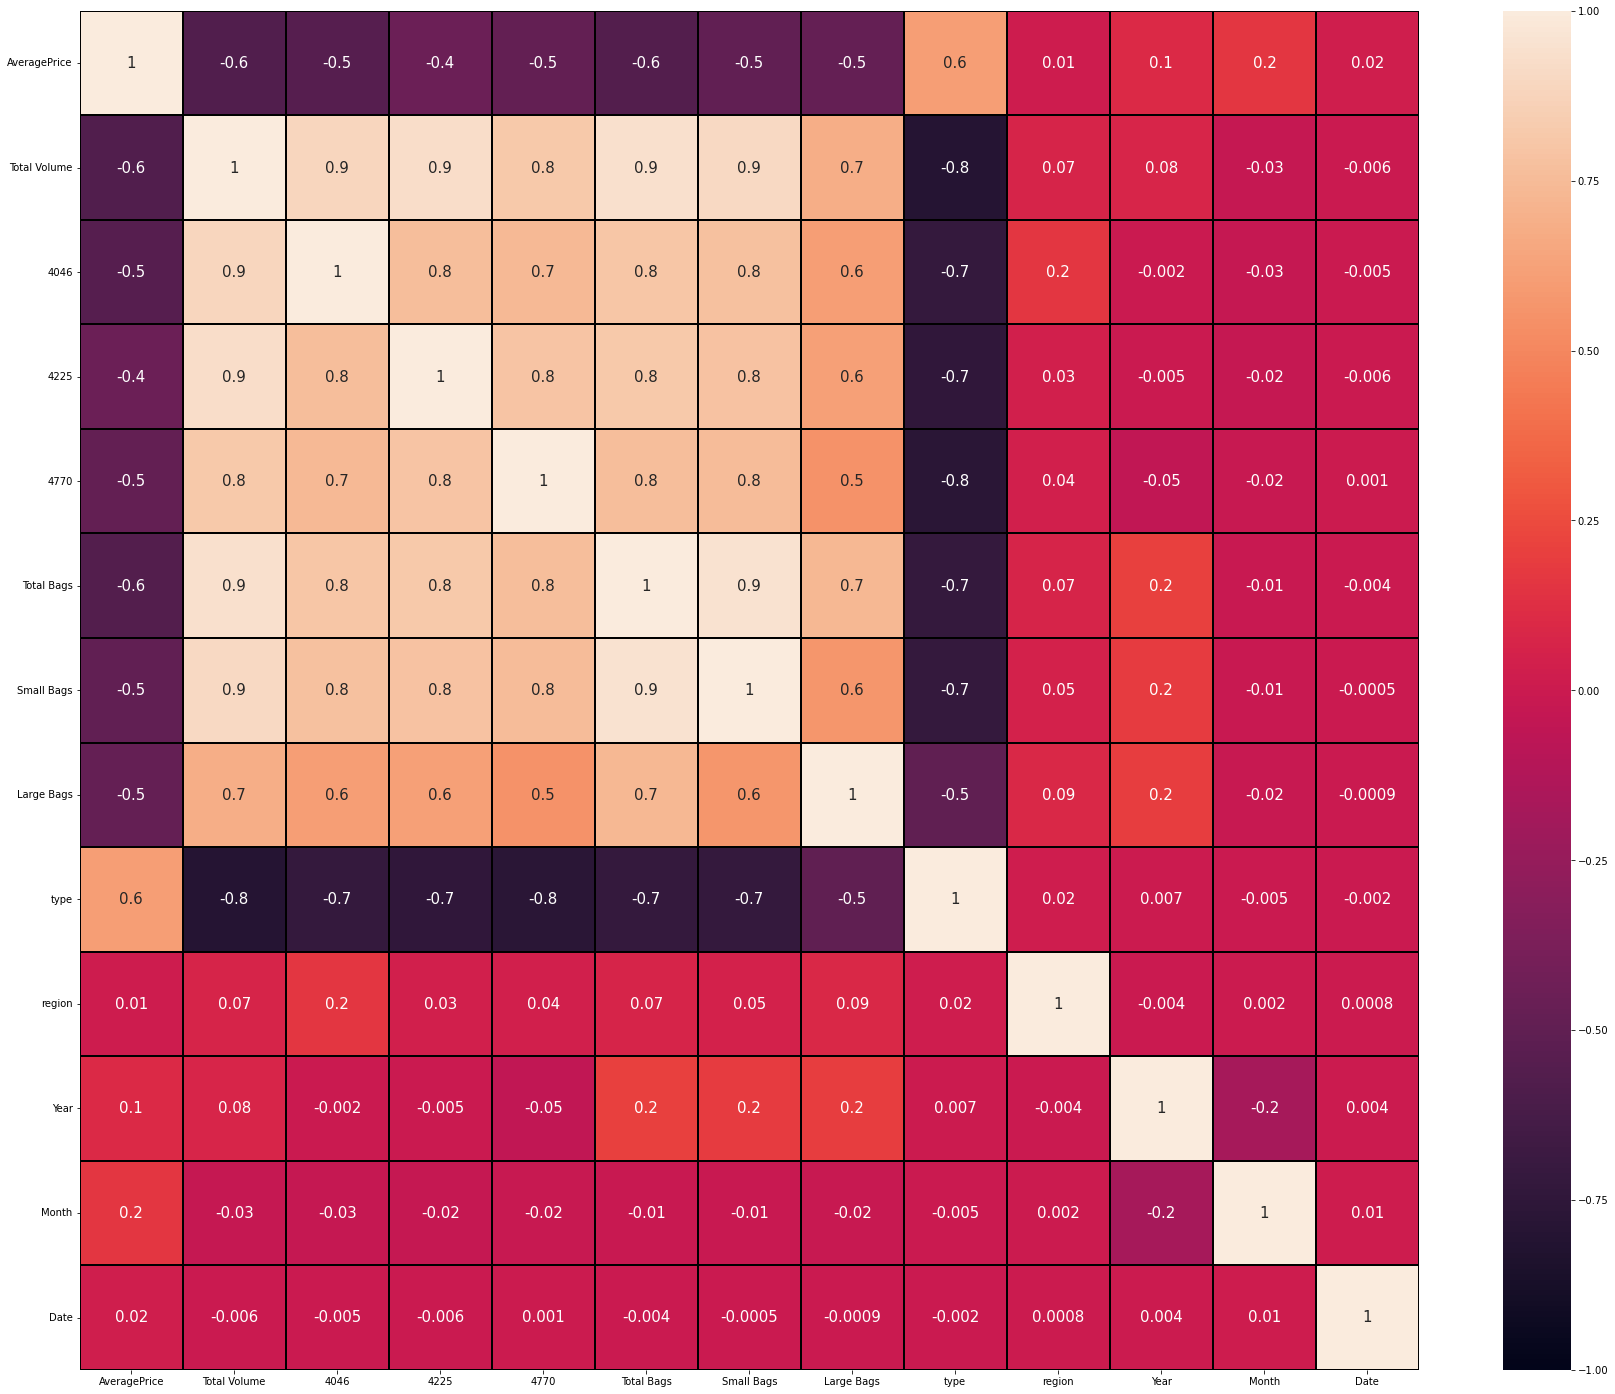

In [112]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(new_df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', linecolor='black', annot = True, annot_kws={'size':15})
plt.yticks(rotation=0);

In [113]:
#let us find the correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
4046            0.159390
Large Bags      0.086573
Total Bags      0.065996
Total Volume    0.065709
Small Bags      0.051985
4770            0.037805
4225            0.032273
type            0.021970
AveragePrice    0.010428
Month           0.002175
Date            0.000751
Year           -0.003610
Name: region, dtype: float64

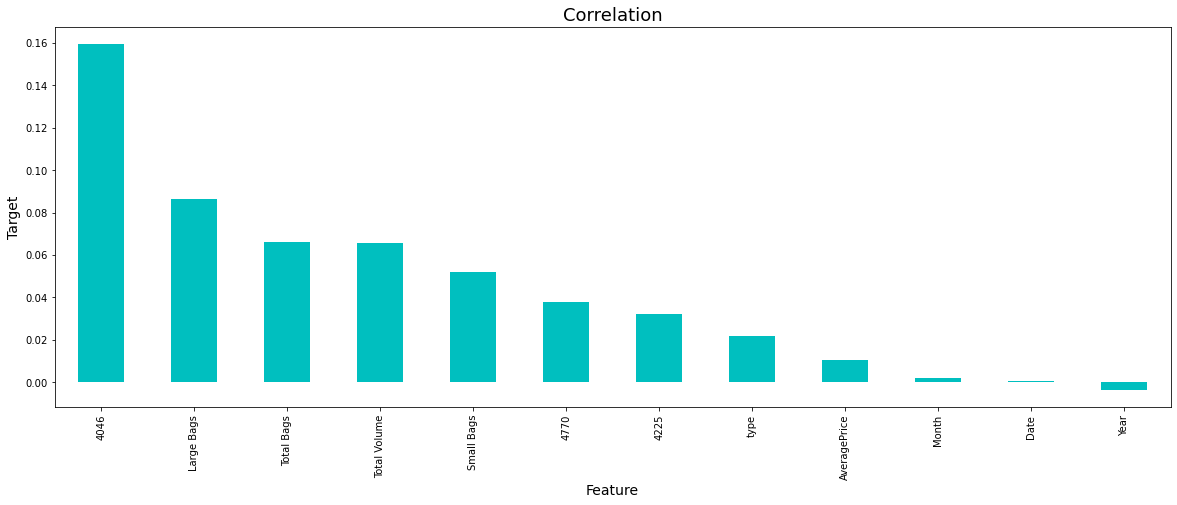

In [114]:
plt.figure(figsize=(20,7))
new_df1.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From above bar plot, we can see that there is no relation with Date, Year, Month and type. So we will drop these column.

In [115]:
# Dropping irrelevant columns
new_df1.drop("Month",axis=1, inplace=True)
new_df1.drop("Date",axis=1, inplace=True)
new_df1.drop("Year",axis=1, inplace=True)

#### Data preprocessing

Separating the independent and target variables into x and y

In [116]:
x = new_df1.drop("region", axis=1)
y = new_df1["region"]

In [117]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,0
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,0
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,0
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,0
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,0
...,...,...,...,...,...,...,...,...,...
7,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,1
8,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,1
9,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,1
10,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,1


# Scaling data using Standar Scaler

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type
0,-0.212660,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.026443
1,-0.162942,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.026443
2,-1.207026,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.026443
3,-0.834139,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.026443
4,-0.336956,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.026443


# Variance Inflation Factor(VIF)

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.941903,AveragePrice
1,52.803808,Total Volume
2,6.694036,4046
3,11.900149,4225
4,3.756094,4770
5,34.110791,Total Bags
6,17.194519,Small Bags
7,3.434390,Large Bags
8,3.717587,type


In [120]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [121]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.884951,AveragePrice
1,3.485772,4046
2,4.355346,4225
3,3.742073,4770
4,25.424143,Total Bags
5,17.184510,Small Bags
6,3.381470,Large Bags
7,3.617215,type


In [122]:
# Dropping the feature Total Volume
x.drop("Total Bags",axis=1, inplace=True)

In [123]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.782355,AveragePrice
1,3.485146,4046
2,4.167858,4225
3,3.738406,4770
4,3.509222,Small Bags
5,1.840231,Large Bags
6,3.603878,type


## Modeling

##### Finding best random state

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [125]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7966711650922177  on Random_state  102


Here we are getting accuracy score of 79.55% with Random state 89

Now splitting the data for Training and Testing purpose. 75% we are considering for Training and 25% for Testing purpose

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

#### Logistic Regression

In [127]:
# Checking accuracy score for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))


0.46041385515069727
[[47  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  6]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  3  2 ...  0  0 10]]
              precision    recall  f1-score   support

           0       0.49      0.57      0.53        82
           1       0.23      0.44      0.30        87
           2       0.60      0.54      0.57        82
           3       0.57      0.34      0.43        91
           4       0.38      0.57      0.46        67
           5       0.53      0.34      0.41        89
           6       0.78      0.86      0.82        58
           7       0.48      0.51      0.49        86
           8       0.76      0.75      0.75        91
           9       0.43      0.73      0.54        88
          10       0.50      0.35      0.41        78
          11       0.46      0.49      0.48        80
          12       0.41      0.50      0.45       104
          13       0.11      0.04      0.06        79
          14 

#### KNeighbors Classifier

In [128]:
# Checking accuracy score for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8459289248762933
[[75  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  1]
 [ 0  0 81 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  1 58  0]
 [ 0  0  1 ...  0  0 55]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        82
           1       0.71      0.82      0.76        87
           2       0.90      0.99      0.94        82
           3       0.85      0.76      0.80        91
           4       0.81      0.91      0.86        67
           5       0.85      0.76      0.80        89
           6       0.95      0.98      0.97        58
           7       0.82      0.94      0.88        86
           8       1.00      0.98      0.99        91
           9       0.68      0.78      0.73        88
          10       0.69      0.81      0.75        78
          11       0.77      0.99      0.87        80
          12       0.90      0.91      0.91       104
          13       0.71      0.67      0.69        79
          14  

#### Decision Tree Classifier

In [129]:
# Checking accuracy score for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)


print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7890238416554206
[[63  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  1]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  3  0 ...  0  0 50]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        82
           1       0.65      0.74      0.69        87
           2       0.85      0.94      0.89        82
           3       0.73      0.76      0.74        91
           4       0.82      0.87      0.84        67
           5       0.67      0.71      0.69        89
           6       0.95      0.97      0.96        58
           7       0.79      0.81      0.80        86
           8       0.92      0.95      0.93        91
           9       0.79      0.77      0.78        88
          10       0.60      0.71      0.65        78
          11       0.77      0.82      0.80        80
          12       0.83      0.83      0.83       104
          13       0.78      0.82      0.80        79
          14  

#### Random Forest Classifier

In [130]:
# Checking accuracy score for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8857399910031489
[[73  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 81 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  1 58  0]
 [ 0  1  0 ...  0  0 60]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        82
           1       0.76      0.82      0.78        87
           2       0.95      0.99      0.97        82
           3       0.94      0.81      0.87        91
           4       0.94      0.96      0.95        67
           5       0.82      0.82      0.82        89
           6       0.98      0.98      0.98        58
           7       0.93      0.92      0.92        86
           8       0.98      0.97      0.97        91
           9       0.91      0.89      0.90        88
          10       0.78      0.88      0.83        78
          11       0.81      0.96      0.88        80
          12       0.95      0.94      0.95       104
          13       0.84      0.87      0.86        79
          14  

#### Support Vector Machine Classifier

In [131]:
# Checking accuracy score for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)


print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7708052181736392
[[75  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  0]
 [ 0  0 76 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  1 58  0]
 [ 0  0  2 ...  0  0 46]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        82
           1       0.54      0.62      0.58        87
           2       0.97      0.93      0.95        82
           3       0.87      0.66      0.75        91
           4       0.71      0.84      0.77        67
           5       0.77      0.65      0.71        89
           6       0.97      0.97      0.97        58
           7       0.78      0.81      0.80        86
           8       0.99      0.95      0.97        91
           9       0.70      0.83      0.76        88
          10       0.56      0.74      0.64        78
          11       0.77      0.93      0.84        80
          12       0.88      0.93      0.91       104
          13       0.59      0.65      0.61        79
          14  

#### Gradient Boosting Classifier

In [132]:
# Checking accuracy score for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)


print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8175888439046334
[[69  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  1]
 [ 0  0 79 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  1 56  0]
 [ 0  0  0 ...  0  0 56]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        82
           1       0.72      0.74      0.73        87
           2       0.96      0.96      0.96        82
           3       0.84      0.68      0.75        91
           4       0.80      0.91      0.85        67
           5       0.76      0.83      0.79        89
           6       0.97      1.00      0.98        58
           7       0.86      0.88      0.87        86
           8       0.99      0.91      0.95        91
           9       0.85      0.76      0.80        88
          10       0.63      0.79      0.70        78
          11       0.74      0.89      0.81        80
          12       0.88      0.88      0.88       104
          13       0.75      0.81      0.78        79
          14  

#### AdaBoost Classifier

In [133]:
# Checking accuracy score for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)


print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.06275303643724696
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  3  0  7]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ... 12  0 21]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.00      0.00      0.00        87
           2       0.00      0.00      0.00        82
           3       0.00      0.00      0.00        91
           4       0.00      0.00      0.00        67
           5       0.00      0.00      0.00        89
           6       0.00      0.00      0.00        58
           7       0.00      0.00      0.00        86
           8       0.00      0.00      0.00        91
           9       0.63      0.19      0.30        88
          10       0.00      0.00      0.00        78
          11       0.00      0.00      0.00        80
          12       0.00      0.00      0.00       104
          13       0.04      0.49      0.07        79
          14 

#### Checking the cross validation score

In [134]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.34141362600970915


In [135]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.620281733478845


In [136]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.5531959193883447


In [137]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.6825936468371591


In [138]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.6252873103400731


In [139]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.602627338858437


In [140]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.06039908316211669


As per the accuracy score and the cross validation score we conclude that Logistic Regression is our best fitting model

## Hyperparameter tuning

In [141]:
# Logistic Regression
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [142]:
GCV = GridSearchCV(LogisticRegression(), parameters, cv=5)

In [143]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [144]:
GCV.best_params_

{'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [145]:
Avacado_region = LogisticRegression(C= 1000.0, penalty="l2",solver = 'newton-cg' )
Avacado_region.fit(x_train, y_train)
pred = Avacado_region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

49.707602339181285


After tuning, our best model score has increased

### Saving the model

In [146]:
# Saving the model using .pkl
import joblib
joblib.dump(Avacado_region,"Avocado_P_Region.pkl")

['Avocado_P_Region.pkl']